In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Balance.csv')
B1 = data['B1'].values
y= np.zeros(len(B1))

In [3]:
for i in range(len(B1)):
    if B1[i]>= 1500:
        y[i]=1
    else:
        y[i]=0

In [36]:
data.head()

,B1
0,1684
1,1559
2,1629
3,1192
4,1835


In [4]:
y

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1.

In [5]:
len(y)

400

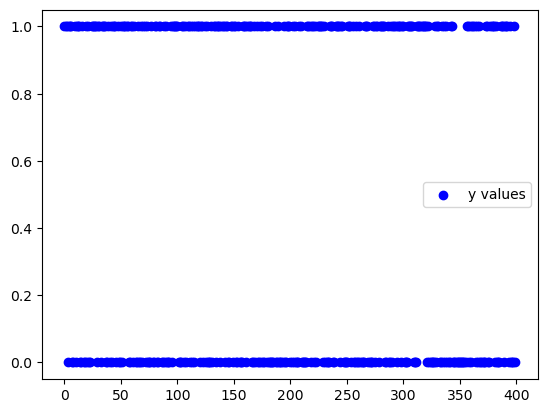

In [6]:
plt.scatter(range(len(y)),y, color='blue', label='y values')  
plt.legend()

In [7]:
#logistic regression
# prob in understanding intercept and coefficient of logistic model

logistic_model = LogisticRegression()
logistic_model.fit(B1.reshape(-1,1), y)

LogisticRegression()

In [8]:
z1 = logistic_model.intercept_[0] + logistic_model.coef_[0][0] * B1
z= 1/ (1+ np.exp(-z1))

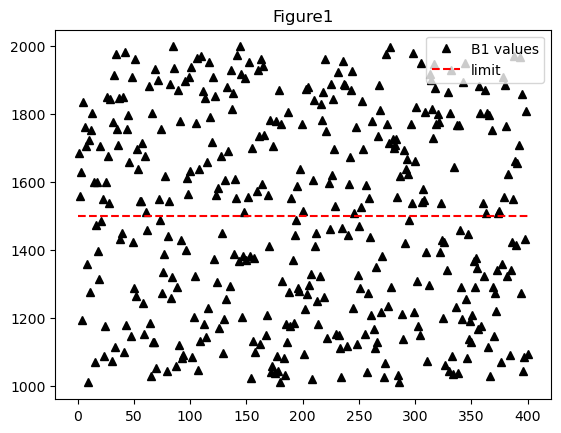

In [9]:
#figure1
plt.plot(range(1,401), B1, 'k^', label='B1 values')
plt.plot([0,401], [1500,1500], 'r--', label='limit')
plt.title('Figure1')
plt.legend()
plt.show()

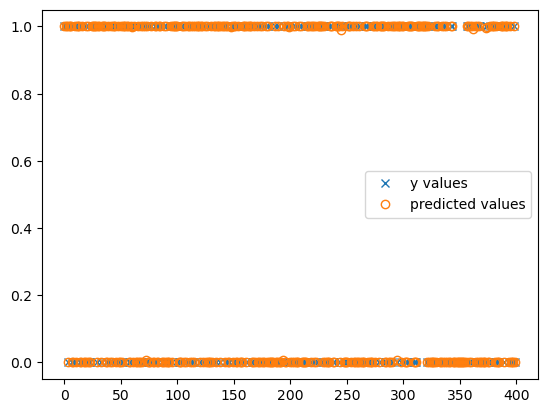

In [10]:
#figure2
plt.figure()
plt.plot(y, 'x', label='y values')
plt.plot(z, 'o', fillstyle='none', label='predicted values')  # why is this not giving sigmoidal curve
plt.legend()
plt.show()

In [11]:
#linear regression
linear_model = LinearRegression()
linear_model.fit(B1.reshape(-1,1),y)
predict = linear_model.predict(B1.reshape(-1,1))

In [12]:
len(predict)

400

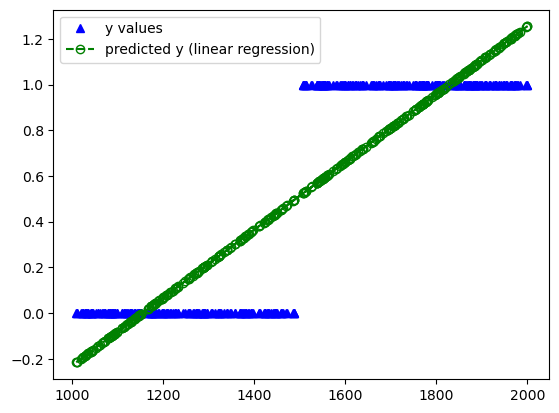

In [13]:
plt.plot(B1, y, 'b^', label='y values')
plt.plot(B1, predict, 'go--', fillstyle='none', label='predicted y (linear regression)')
plt.legend()
plt.show()

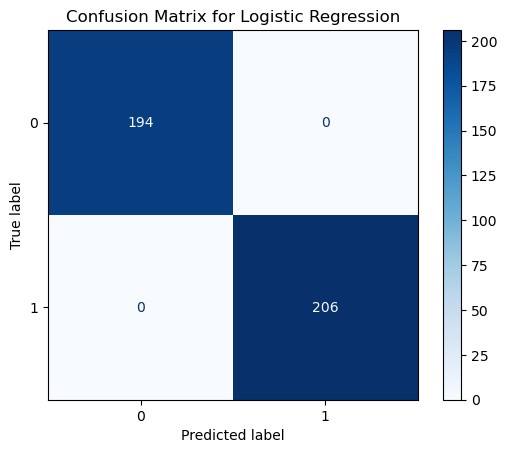

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = (z >= 0.5).astype(int)  # Convert probabilities to binary values (0 or 1)
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [15]:
z

array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 5.88455603e-067,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 8.52140647e-031,
       1.39446806e-106, 1.00000000e+000, 1.49592588e-048, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 2.25342763e-093, 2.50377203e-006,
       1.00000000e+000, 8.75356572e-023, 1.53668124e-040, 1.00000000e+000,
       2.68455634e-003, 1.00000000e+000, 1.08114237e-089, 7.44976728e-071,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 9.99999997e-001,
       1.00000000e+000, 6.10811294e-093, 1.00000000e+000, 1.00000000e+000,
       1.24960026e-083, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 3.31738035e-015, 1.59160224e-011, 1.00000000e+000,
       4.28808666e-087, 1.00000000e+000, 3.32458830e-070, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.06117305e-076, 1.00000000e+000,
       6.14527739e-017, 3.60378620e-046, 1.00000000e+000, 3.77163286e-051,
       1.00000000e+000, 1

In [16]:
len(z)

400

In [17]:
len(y)

400